In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

In [87]:
x,y = make_regression(n_samples=1000,n_features=10,n_targets=1,noise=3.0)

In [88]:
x[0]

array([-0.1959593 , -1.98607776, -0.41753087, -0.57545904,  0.59417252,
        0.48098148, -0.69899436,  0.14274529, -0.52273891, -0.84679743])

In [89]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-0.195959,-1.986078,-0.417531,-0.575459,0.594173,0.480981,-0.698994,0.142745,-0.522739,-0.846797
1,2.045714,-0.365266,-0.110445,1.037137,-0.884642,0.336481,0.057597,-0.652549,0.821096,-0.626822
2,-0.201264,-0.379115,-0.192610,0.205230,1.316266,0.273148,0.442235,-1.331530,1.004806,-0.984240
3,0.769087,3.088102,-0.517835,0.081365,-0.670756,0.151856,0.989269,-1.596440,-0.839531,-1.763073
4,0.849049,-0.335947,1.855301,-1.109738,-1.391996,0.322167,-1.263666,-0.965482,0.233210,-0.669221
...,...,...,...,...,...,...,...,...,...,...
995,-0.854405,1.352720,-0.128440,-0.168583,-1.112161,0.685872,2.418466,0.978609,0.815751,-2.189486
996,0.189247,0.122828,0.203103,0.269042,0.091695,1.018024,-0.697207,-0.295398,-1.980069,1.198470
997,0.297069,-0.687720,-0.004512,0.378246,1.211053,-1.571687,-0.334181,1.465156,2.363566,-0.337236
998,-0.686087,1.268709,1.395715,0.139889,0.587541,0.432959,0.126838,0.501021,0.152581,-0.588260


In [90]:
pd.DataFrame(x)[0]

0     -0.195959
1      2.045714
2     -0.201264
3      0.769087
4      0.849049
         ...   
995   -0.854405
996    0.189247
997    0.297069
998   -0.686087
999    0.036026
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

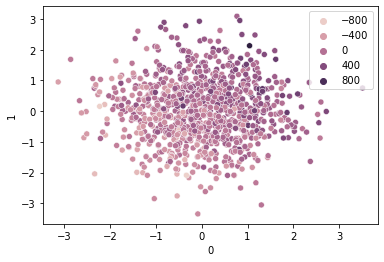

In [91]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [93]:
from sklearn.svm import SVR

In [94]:
svr = SVR(kernel='linear')

In [95]:
svr

SVR(kernel='linear')

In [96]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [97]:
svr.coef_

array([[97.05477981, 99.27028471,  8.34949946, 72.74640078, 81.39165716,
        93.12002929, 62.80239972, 85.10192502, 88.22167466, 29.52792088]])

In [98]:
y_pred = svr.predict(x_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
print(r2_score(y_test,y_pred))

0.9997981676003214


In [101]:
# Hyperparameter tuining with SVR

In [102]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [103]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [104]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.342 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.340 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.337 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.332 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.340 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.342 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.340 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.337 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.332 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.340 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=1.000 total time=   0.0

[CV 3/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s

[CV 3/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.4s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.4s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.4s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.8s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=1.000 total time=   0.4s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.4s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=1.000 total time=   0.8s


[CV 2/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   3.1s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   4.2s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   3.7s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=1.000 total time=   3.5s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.1s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.1s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   4.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.6s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=1.000 total time=   3.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=1.000 total time=   3.0s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [105]:
grid.best_params_


{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [106]:
grid.predict(x_test)

array([-313.08683015,  176.07571931, -248.59813644, -495.05227676,
       -192.19452468, -159.28123023,   61.37979002,  -65.72357701,
        -24.17713122, -151.35323642, -155.72515297,   54.24465796,
        278.88889205, -323.98303756,   -6.47180211, -288.51620897,
       -835.22186317, -186.27322306, -298.76315076,  182.86251516,
        283.95913957, -417.3183119 ,   10.11590175,  -48.43680201,
       -184.48099059, -282.64482647, -351.66014587, -290.64526546,
       -497.77315799,  -81.85019443,  -59.3689656 ,  312.65230082,
        -55.21000831,  388.19833922,  264.60564534,  517.35490283,
        -22.32805353, -115.12876777, -205.66185922, -494.33052982,
        222.6184287 , -131.88175451,   67.51559991,   37.48154374,
         16.23727513, -411.54165217,  -35.41314363,   22.57841008,
        342.47720693,   14.27672388, -104.22926001,  -62.99161006,
         50.14247316,   38.31352357,   72.21483157,  390.90404822,
         95.39731134, -123.50396637, -170.4121588 ,  311.00058

In [107]:
r2_score(y_test,y_pred)

0.9997981676003214

In [ ]:
from sklearn.me